# Problem Statement :-

    Data Visualization III
        Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
        https://archive.ics.uci.edu/ml/datasets/Iris). Scan the dataset and give the inference as:
            1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
            2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
            3. Create a box plot for each feature in the dataset.
            4. Compare distributions and identify outliers.

## Importing Libraries and dataset

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Task1:

In [25]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [26]:
df.info()
# there are 4 numeric columns and 1 nominal data type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Task2:

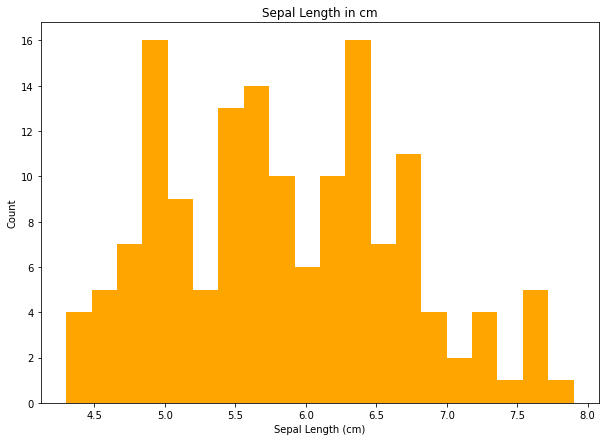

In [27]:
plt.figure(figsize = (10, 7))
x = df['sepal_length']

plt.hist(x, bins = 20, color = 'orange')
plt.title('Sepal Length in cm')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Count')
plt.show()

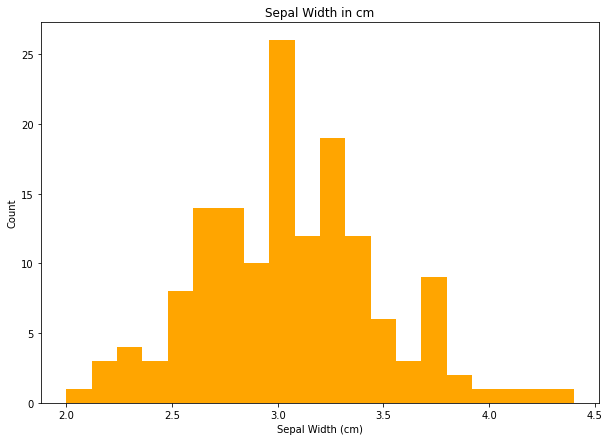

In [28]:
plt.figure(figsize = (10, 7))
x = df['sepal_width']

plt.hist(x, bins = 20, color = 'orange')
plt.title('Sepal Width in cm')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Count')
plt.show()

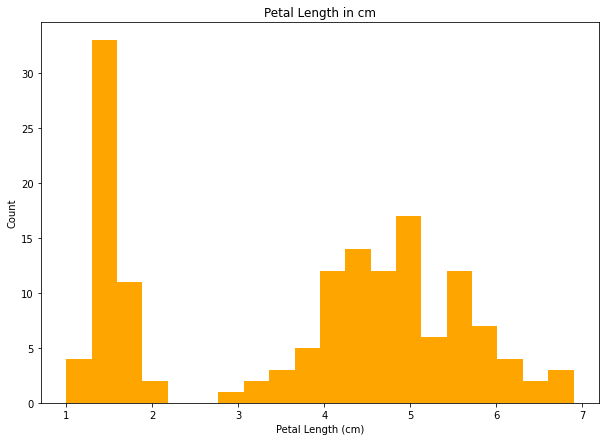

In [29]:
plt.figure(figsize = (10, 7))
x = df['petal_length']

plt.hist(x, bins = 20, color = 'orange')
plt.title('Petal Length in cm')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.show()

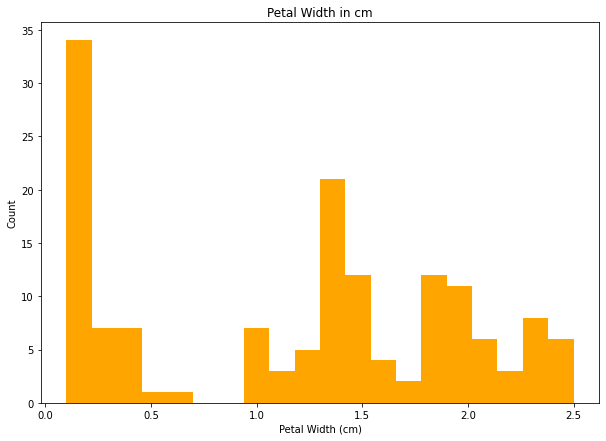

In [30]:
plt.figure(figsize = (10, 7))
x = df['petal_width']

plt.hist(x, bins = 20, color = 'orange')
plt.title('Petal Width in cm')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Count')
plt.show()

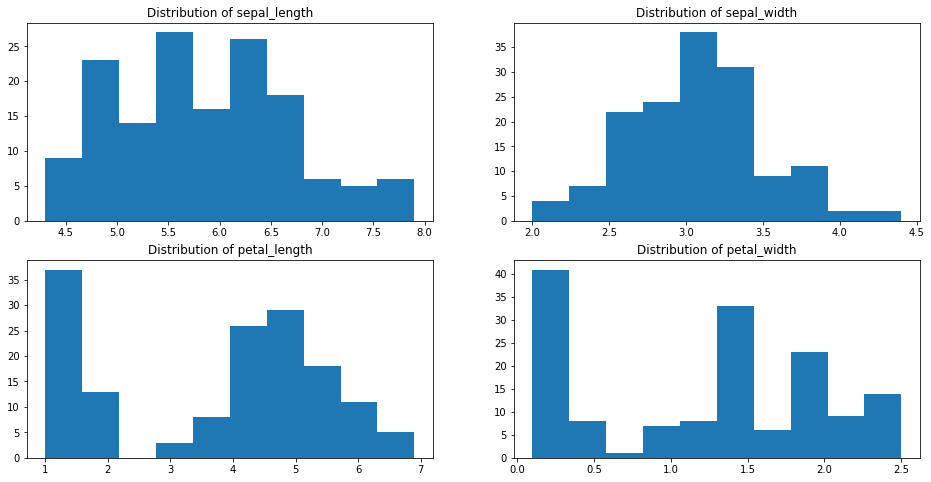

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()
cols = df.columns[:4]
for i, k in enumerate(cols):
    axes[i].set_title('Distribution of ' + k)
    axes[i].hist(df[k])

# Task3:

<AxesSubplot:xlabel='sepal_length'>

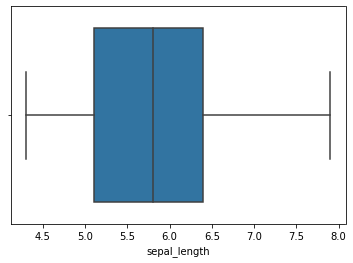

In [33]:
sns.boxplot(data = df, x = 'sepal_length')

<AxesSubplot:xlabel='sepal_width'>

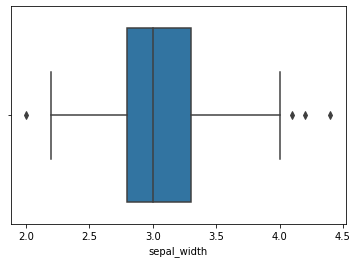

In [34]:
sns.boxplot(data = df, x = 'sepal_width')

<AxesSubplot:xlabel='petal_length'>

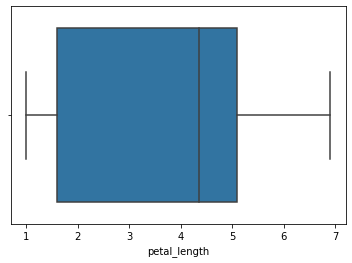

In [35]:
sns.boxplot(data = df, x = 'petal_length')

<AxesSubplot:xlabel='petal_width'>

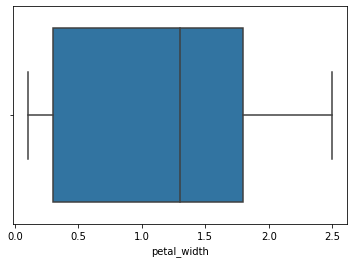

In [36]:
sns.boxplot(data = df, x = 'petal_width')

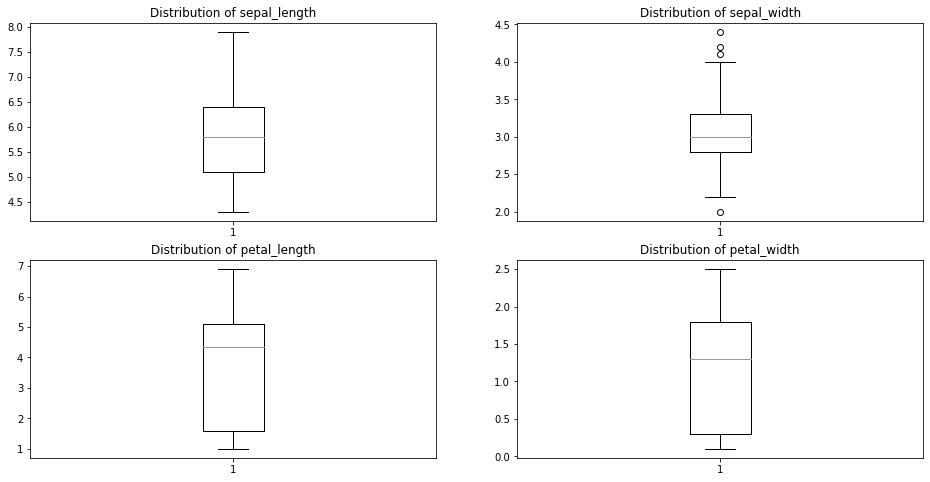

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()
cols = df.columns[:4]
for i, k in enumerate(cols):
    axes[i].set_title('Distribution of ' + k)
    axes[i].boxplot(data=df, x=k)

# Task4:

In [ ]:
# Outlier is defined as a data point that is located outside the whiskers of the box plot. 
# For example, outside 1.5 times the interquartile range above the upper quartile and below the lower quartile 
# (Q1 - 1.5*IQR or Q3 + 1.5*IQR).

In [ ]:
# If we observe closely. for the box 2, interquartile distance is roughly around 0.75 hence the values lying beyond 
# this range of (Q3 + 1.5*IQR) or values lying below (Q1 - 1.5*IQR) are considered as outliers.

In [42]:
# Outliers for sepal width column

Q1 = np.percentile(df['sepal_width'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['sepal_width'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound (Maximum)
upper = Q3+1.5*IQR

# Lower bound(Minimum)
lower = Q1-1.5*IQR

print("Upper bound(Maximum) : ", upper)
print("Lower bound(Minimum) : ", lower)


Upper bound(Maximum) :  4.05
Lower bound(Minimum) :  2.05


In [50]:
# values below 2.05 or above 4.05 are considered as outliers

print("Outliers: \n\n", df[(df['sepal_width']<lower) | (df['sepal_width']>upper)])

Outliers: 

     sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


In [51]:
# Removing the Outliers
print("Old Shape: ", df.shape) 
df = df[(df['sepal_width']>=lower) & (df['sepal_width']<=upper)]
print("New Shape: ", df.shape)

Old Shape:  (150, 5)
New Shape:  (146, 5)
